In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import itertools
import seaborn as sns
import math

%matplotlib inline

In [2]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
!pip3 install missingno

You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In [4]:
import missingno as msno
from pandas.plotting import scatter_matrix

This is programming assignment for week 5. In this assignment you will be solving classification task. 

### Grading
The assignment contains both automatically graded and peer reviewed tasks. 

**Automatic grading**\
After you finish solving all the tasks restart the kernel (`kernel -> restart`) and and click button `Validate` to check that everything works as expected. Afterwards, you can submit your work.


**Competition**\
In the second part of the assignment you are asked to train the model with the best score on test dataset. Note, that you are not given correct answers on the test dataset. To get your score, use Kaggle competition, that we've created for you. **The score on the Kaggle liderboard will not affect your grade, instead you need to submit your best result to the separate programming assignment `Predictions on the test set.`** This task is considered passed if your $F_1$ score on the test is larger than 0.7. But we encourage you to try and get larger scores, you can definitely do it:)


**Peer Review**\
Some of the tasks cannot be checked automatically,  therefore, we'll be using peer review. Please, download this notebook with solutions (`File → Download as → Notebook (.ipynb)`) and submit it for peer review. Each peer reviewed task contains grading instructions. 



# Table of Contents:
* [Part1.](#part1) Decision Trees
 - [Task 1](#task1)[1 pt]
 - [Task 2](#task2)[1 pt]
 - [Task 3](#task3)[Peer Review]
* [Part2.](#part2) Competition! [Peer Review]
    

## Part 1. Let's train some decision trees. <a class="anchor" id="part1"></a>

In this part, we will do the simplest preprocessig of the dataset and train decision trees. In the task, you are supposed to predict whether income of a person exceeds \$50K/year. The target variable is equal to `1` if a person earns > \$50k/year and `0` otherwise. 

As an evaluation criterion, we will be using $F_1$score. As you know, it is a weighted average of precision and recall. We are not using accuracy, because the dataset is imbalanced. 

In [34]:
train_data = pd.read_csv('week5_train.csv')
train_data.head()

,age,workclass,education,education_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0.0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0.0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0.0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0.0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0.0


In [6]:
tr, val = train_test_split(train_data, test_size=0.4, random_state=42)

y_train = tr.target
y_valid = val.target
X_train = tr.drop(['target'], axis=1)
X_valid = val.drop(['target'], axis=1)

<a class="anchor" id="task1"></a>

---
**Task 1** [1 pt] Create `column_transformer` which has the following steps:
- fills all the missing values 
- encodes all the categorical features using OHE 
- scales numerical features.

P.S. note, that you'll have to import all the required modules yourself.

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [8]:
cat_col = X_train.columns[X_train.dtypes == 'object'].tolist() 
num_col = X_train.columns[X_train.dtypes != 'object'].tolist() 

In [9]:
num_col

['age', 'education_years', 'capital_gain', 'capital_loss', 'hours_per_week']

In [10]:
# your code here
cat_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder())
num_pipe = make_pipeline(StandardScaler())
column_transformer = ColumnTransformer([
    ('cat_feat_prep',cat_pipe, cat_col),
    ('num_feat_prep', num_pipe, num_col)
])


In [11]:
X_transformed = column_transformer.fit_transform(X_train)
X_transformed.shape

X_transformed = column_transformer.fit_transform(X_train)
assert X_transformed.shape[0] == 19536
assert X_transformed.shape[1] == 104

<a class="anchor" id="task2"></a>

---
**Task 2** [1 pt] Create a function `tree_pipe`, which given a maximal tree depth returns a pipeline with two steps:

1. Column transformer (defined above)
2. DecisionTreeClassfier with the required `max_depth` parameter

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

def tree_pipe(max_depth):
    # your code here
    pipeline = make_pipeline(column_transformer, DecisionTreeClassifier(max_depth=max_depth))
    return pipeline

In [13]:
test_pipe = tree_pipe(1)

test_pipe = tree_pipe(12)
tree = test_pipe.steps[1][1]
assert tree.max_depth == 12

<a class="anchor" id="task3"></a>

---
**Task 3** [Peer Reviewed] Fit decision trees of different depth (from 1 to 100) using the function from the **task 2**. For each depth calculate $F_1$score on the train and validation datasets. Draw a plot, how both scores depend on the maximal tree depth

In [14]:
from sklearn.metrics import f1_score
# your code here

depths = [1, 5, 10, 20, 40, 100, 200]
f1_val = []
fi_tr = []
for depth in depths:
    pipe = tree_pipe(depth)
    pipe.fit(X_train, y_train)
    y_valid_pred = pipe.predict(X_valid)
    y_train_pred = pipe.predict(X_train)
    f1_val.append(f1_score(y_valid, y_valid_pred))
    fi_tr.append(f1_score(y_train, y_train_pred))


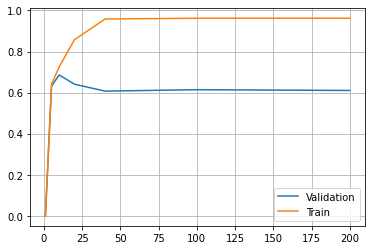

In [15]:
plt.plot(depths,f1_val, label = 'Validation')
plt.plot(depths,fi_tr, label = 'Train')
plt.grid()
plt.legend()
plt.show()

## Part 2. Let's compete. <a class="anchor" id="part2"></a>

In this second part of the assignment your task will be straightforward: achieve the best possible score on the test set. To make everything fair, we will be using [Kaggle competition](https://www.kaggle.com/c/predict-income-group). 

At this stage you are free to use any models or preprocessing methods you want. You can use assignemnts from the previous weeks as an inspiration!

Below you can see how the test dataset can be loaded.  

In [17]:
test_data = pd.read_csv('week5_test.csv')
test_data.head()

,age,workclass,education,education_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States


Even though we do not restrict you a lot in this task, we still ask you to stick to the following steps, which will be graded by your peers

**Peer Review Grading.** Below you will find the list of criteria for peer review:
1. Consider categorical features. Show which feature are categorical, check if all the categories are reasonable. Provide plots. [press to check](#pr1)
2. Consider numerical features [press to check](#pr2)
3. Fill missing values. [press to check](#pr3)
4. Explore different hyperparameters of the decision trees (not only `max_depth`) [press to check](#pr4)
5. Choose the best model using cross-validation or just validation
6. Make a prediction on the test set.
7. Try to make your code readable. Do not forget to leave comments.

<a class="anchor" id="pr1"></a>
### Categorical fetures investigation

In [18]:
print(f'Categorical features are: {cat_col}')

Categorical features are: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


#### Barplots for  categorical features

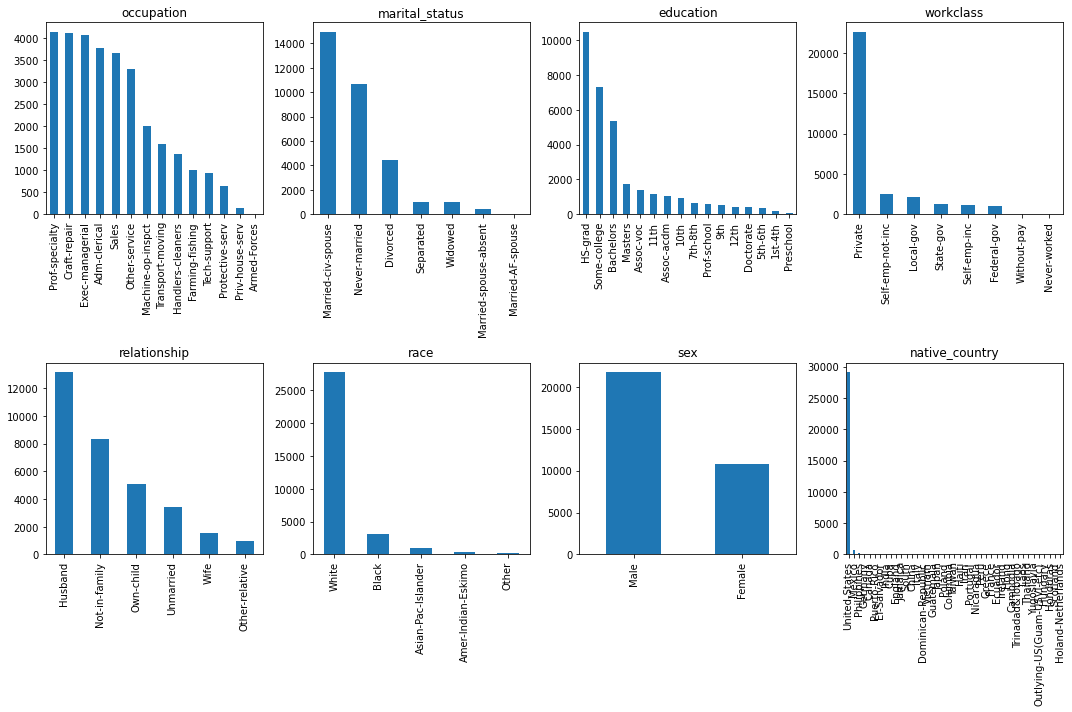

In [19]:
n = len(cat_col)
fig, axs = plt.subplots(2,4,figsize=(15,10))
for i, cat in enumerate(cat_col):
    train_data[cat].value_counts().plot(kind='bar', ax =axs[i//4,min(abs(4-i),abs(3-i))])
    axs[i//4,min(abs(4-i),abs(3-i))].title.set_text(cat)
plt.tight_layout()

#### 'native_country' barplot is not clearly visible, let's have a closer look

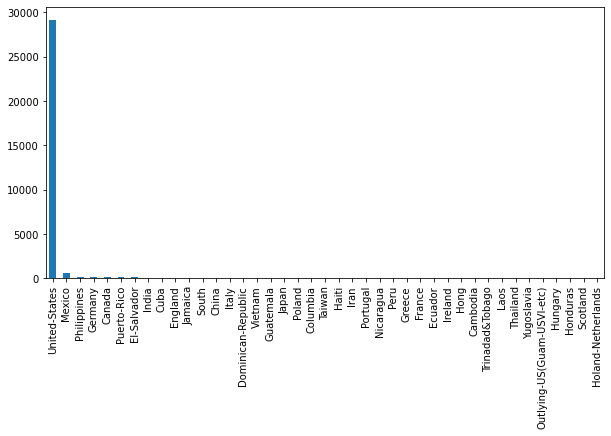

In [20]:
train_data['native_country'].value_counts().plot(kind='bar', figsize = (10,5))

#### From the barplots it visible that 'race' and 'country' have one overrepresented values, thus these features already seem uninformative. 

#### It seems that some features have correlated data, for example marital status and gender, marital status and relationship. Workclass and occupation. Let's cheeck it out.

In [21]:
def cramers_v(x,y):
    """Function that conputes correlation between two categorical variables using Cramér's V statistic"""
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [22]:
cat_cor = dict()

for comb in itertools.combinations(cat_col + ['target'] ,2):
    cat_cor.update({(comb[0], comb[1]): cramers_v(train_data[comb[0]],train_data[comb[1]])})

In [23]:
cat_cor = sorted(cat_cor.items(), key = lambda item: item[1],reverse=True)
print('These are the correlations between categorical varibles in a form "vatriable pair: correlation statistic"')
for pair in cat_cor:
    print(pair[0], ':', pair[1])

These are the correlations between categorical varibles in a form "vatriable pair: correlation statistic"
('relationship', 'sex') : 0.6488919835476713
('marital_status', 'relationship') : 0.4878118703234346
('marital_status', 'sex') : 0.46163457706190386
('relationship', 'target') : 0.4534225818863113
('marital_status', 'target') : 0.4472047182882558
('occupation', 'sex') : 0.4337804392331305
('race', 'native_country') : 0.4206701205498522
('education', 'target') : 0.3682189037932643
('occupation', 'target') : 0.34855835992127226
('sex', 'target') : 0.21583599679826912
('workclass', 'occupation') : 0.21504685867116732
('education', 'occupation') : 0.1962500790133617
('occupation', 'relationship') : 0.17680191661980038
('workclass', 'target') : 0.16343991812220787
('workclass', 'sex') : 0.14313702352475383
('marital_status', 'occupation') : 0.12989569771194034
('education', 'native_country') : 0.12921412257658077
('education', 'relationship') : 0.12077044880939318
('race', 'sex') : 0.11

#### As I said 'relationship', 'mariatal status' and 'sex' are related features, so I would keep just 'relationship' and 'sex' features. 
Probbaly, sex is related to relationship because of larger amout of data corresponding to males. Talking about 'sex' it make sense to binarize it (i.e Male - 1,Female - 0).

<a class="anchor" id="sel"></a>
Also there are to many classes in  'occupation', 'relationship', 'workclass'and 'education' features. Later in the notebook you will find RFE feature selection, based on which I decided to merge some of the classes.\
\
<b>Merging of some categories will looks like this</b>\
Relationship: \
spouses = husband+whife\
not_in_fam = Not-in-family + Unmarried\
some_fam = Own-child + Other-relative\
\
workclass:\
no_pay = Without-pay + Never-worked\
\
occupation:\
Protective-serv = Protective-serv+Armed-Forces\
Other-service = Other-service + Priv-house-serv\
\
education:\
pri_sc = 1st-4th + Preschool \
middle_sc =  5th-6th + 7th-8th \
high_sc = 9th + 10th + 11th + 12th 



<a class="anchor" id="pr2"></a>
### Numerical fetures investigation

In [24]:
print(f'Numerical features are: {num_col}')

Numerical features are: ['age', 'education_years', 'capital_gain', 'capital_loss', 'hours_per_week']


Let's have a look to the distribution of these variables and their paired distributions.

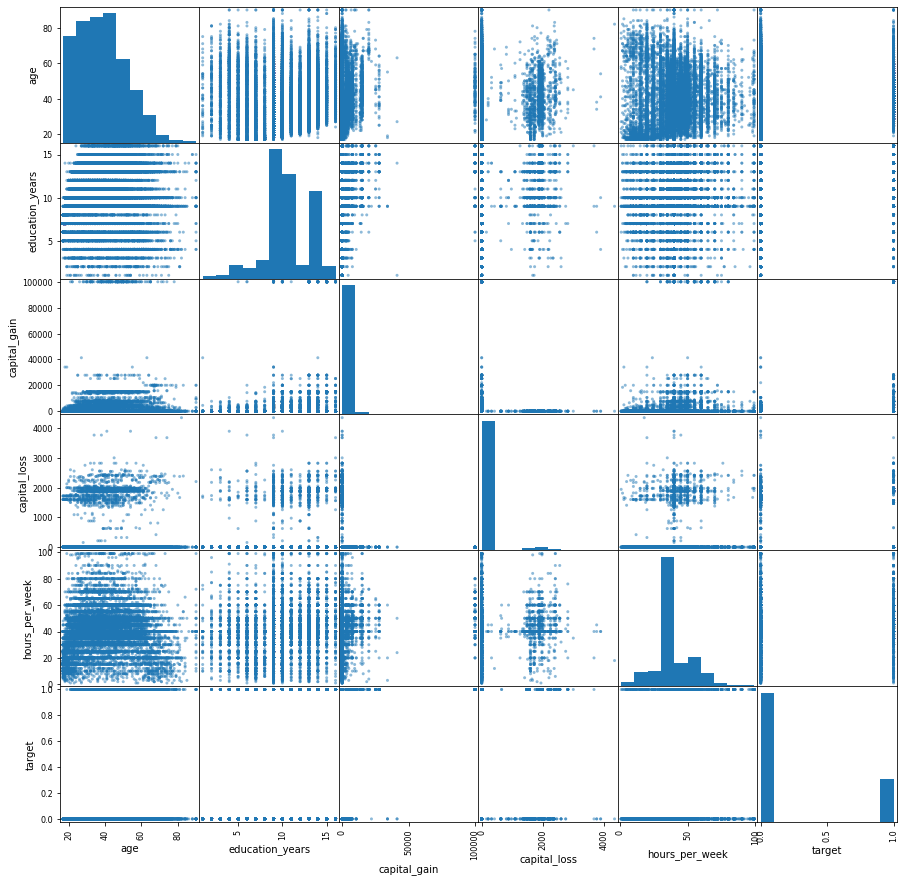

In [25]:
scatter_matrix(train_data.dropna(axis=0, inplace=False), figsize=(15,15))
plt.show()

Distribution of 'capital gain' and 'capital loss' is very skewed, they definitly need normalization.

Moreover we can combine these features into one single calculating their difference: 'capital_gain' - 'capital_loss'.

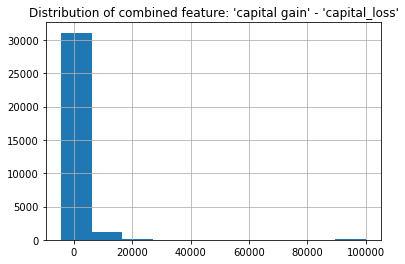

In [27]:
(train_data['capital_gain'] - train_data['capital_loss']).hist()
plt.title("Distribution of combined feature: 'capital gain' - 'capital_loss'")
plt.show()

Let's examine correlation of numerical values between each other and the target

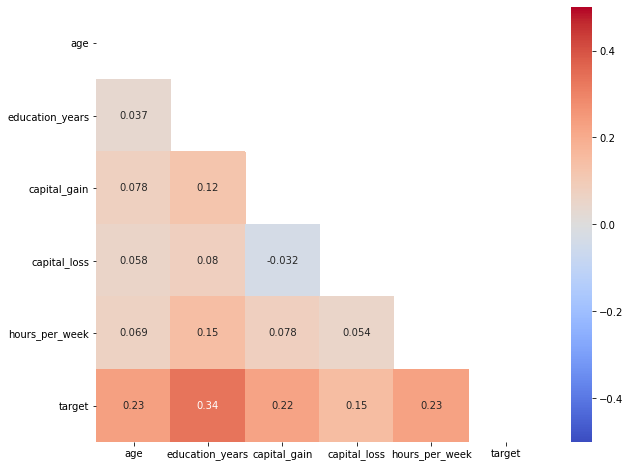

In [28]:
corr =train_data.corr()
mask = np.triu(corr)
plt.figure(figsize=(10,8))
sns.heatmap(corr, vmin=-0.5, vmax=0.5, cmap= 'coolwarm', annot=True, mask=mask)

All numerical features seem important for target prediction. Also they do not strongly correlate between each other.

<a class="anchor" id="pr3"></a>
### Filling missing values.

First let's see how many missing values we have in the train dataset.

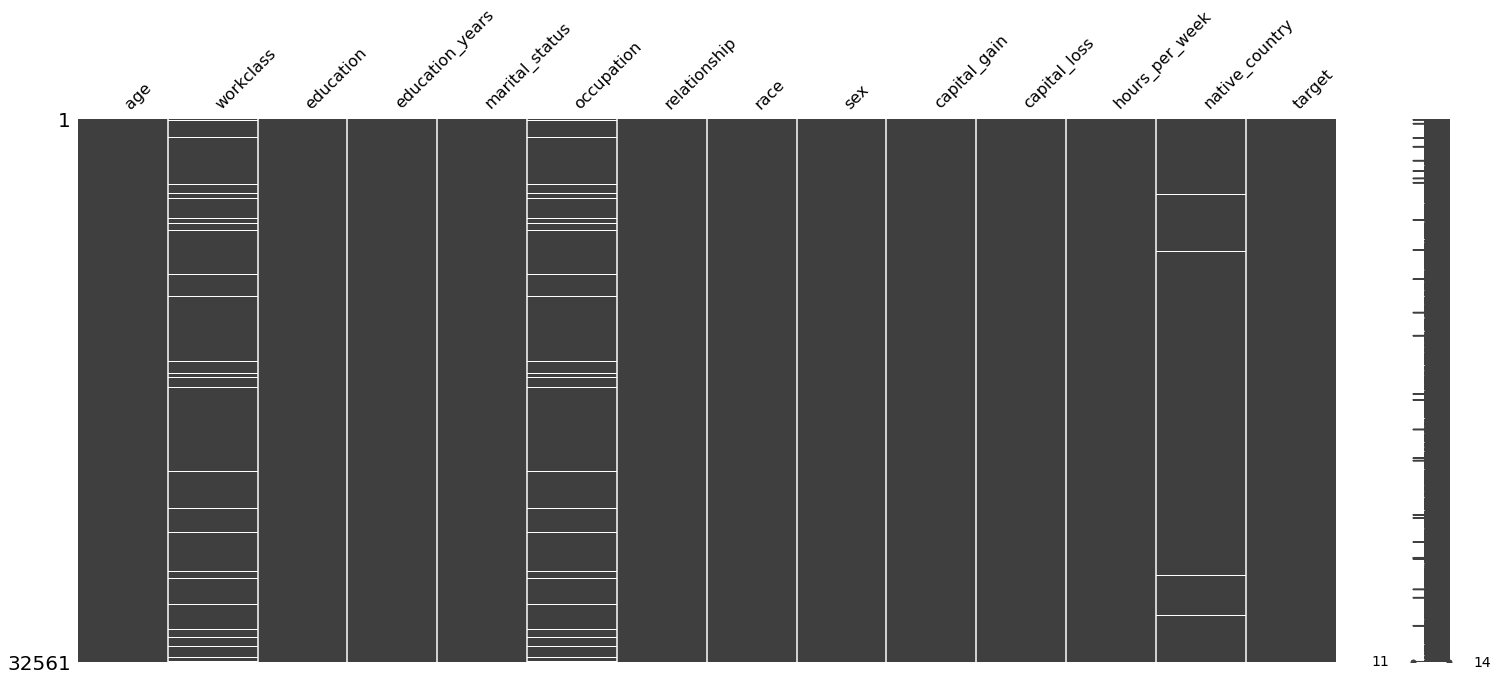

In [35]:
msno.matrix(train_data)

Exactly those rows that miss 'workclass' miss also 'occupation' data.

Text(0.5, 0, 'Features')

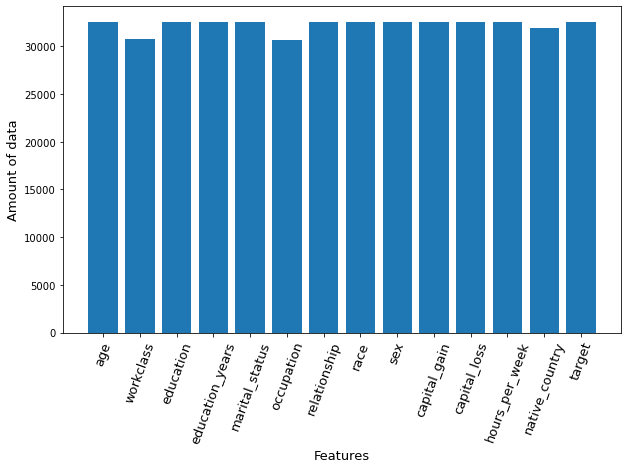

In [36]:
plt.figure(figsize=(10,6))
plt.bar(train_data.columns, train_data.count())
plt.xticks(rotation=70,fontsize=13)
plt.ylabel('Amount of data',fontsize=13)
plt.xlabel('Features',fontsize=13)

Since 'race' and 'native_country' had one dominating value,I drop these columns and don't care about missing values in them.

The proportion of missing data is low, so I would just drop rows with them and select featuatures first.

In [37]:
train_data.columns

Index(['age', 'workclass', 'education', 'education_years', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'target'],
      dtype='object')

In [31]:
#train_data.drop(['race','native_country'], axis=1, inplace=True)

In [38]:
nt = train_data.target.value_counts()
nt_wo_null = train_data.target.value_counts()- train_data[train_data['occupation'].isnull()].target.value_counts()

In [39]:
prop_1_wo_null = nt_wo_null[1]/nt_wo_null[0]
prop_1 =  nt[1]/nt[0]

If we will drop rows with missing values we will not make our 'target' data more imbalanced.

In [40]:
print(f"Proportion of 1's in the target value\n in whole train dataset:{round(prop_1,2)}\n in cleaned dataset: {round(prop_1_wo_null,2)}")

Proportion of 1's in the target value
 in whole train dataset:0.32
 in cleaned dataset: 0.33


In [41]:
train_data_cl = train_data.dropna(axis=0)

Now time for feature selection.

In [42]:
tr_wo_null, val_wo_null = train_test_split(train_data_cl, test_size=0.4, random_state=42)
y_train_won = tr_wo_null.target
y_valid_won = val_wo_null.target
X_train_won = tr_wo_null.drop(['target'], axis=1)
X_valid_won = val_wo_null.drop(['target'], axis=1)

In [43]:
selector = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)

In [44]:
cl_num = X_train_won.columns[X_train_won.dtypes != 'object'].tolist() 
cl_cat = X_train_won.columns[X_train_won.dtypes == 'object'].tolist() 

In [45]:
simple_cl_tr = ColumnTransformer([
    ('num_feat_prep', num_pipe, cl_num),
    ('cat_feat_prep',cat_pipe, cl_cat)
])

In [207]:
feature_sel = RFE(estimator=DecisionTreeClassifier())
selection_pipe = Pipeline(steps = [
    ("col_transformer", simple_cl_tr),
    ("feat_selector", feature_sel)
])

In [212]:
selection_pipe.fit(X_train_won, y_train_won)

Pipeline(memory=None,
         steps=[('col_transformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num_feat_prep',
                                                  Pipeline(memory=None,
                                                           steps=[('standardscaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['age', 'education_years',
                                                   'capital_gain',
                        

In [249]:
d_imp = dict(zip(pd.get_dummies(X_train_won).columns,feature_sel.ranking_))

In [252]:
df_imp = pd.DataFrame(d_imp.items(),columns=['feature', 'ranking'])

These are feature rankings for a Decision tree. Lower the rank  more important the feature is.

In [254]:
df_imp.sort_values(by='ranking', axis=0)

,feature,ranking
0,age,1
29,marital_status_Married-civ-spouse,1
31,marital_status_Never-married,1
34,occupation_Adm-clerical,1
36,occupation_Craft-repair,1
37,occupation_Exec-managerial,1
38,occupation_Farming-fishing,1
40,occupation_Machine-op-inspct,1
41,occupation_Other-service,1
43,occupation_Prof-specialty,1


Looks like all selected features are important, just some of their categories not, so I will merge some of their subclases as [I stated before](#sel).

So we need to fill missing values in 'ocupation' and 'workclass'. 'Occupation' was most correlated with 'sex', let's explore how that can help us.

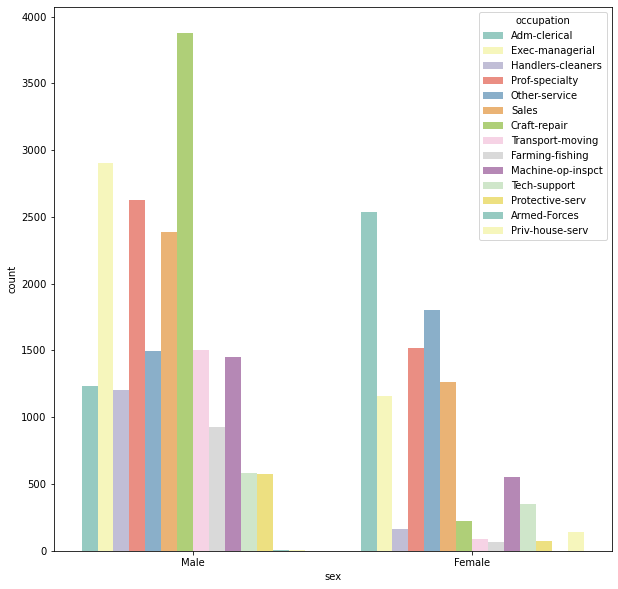

In [46]:
plt.figure(figsize=(10,10))
sns.countplot(x='sex', hue='occupation', data=train_data, palette="Set3")

The most popular occupation for male is 'Craft-repair' and for female - 'Adm-clerical'. Futher will fill in occupation depending on 'sex'.

People working as 'Craft-repair' or 'Adm-clerical' seem to have similar  distribution of 'age', 'education in years' and 'hours-per-week'. So I will not go that deep when filling missing values.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

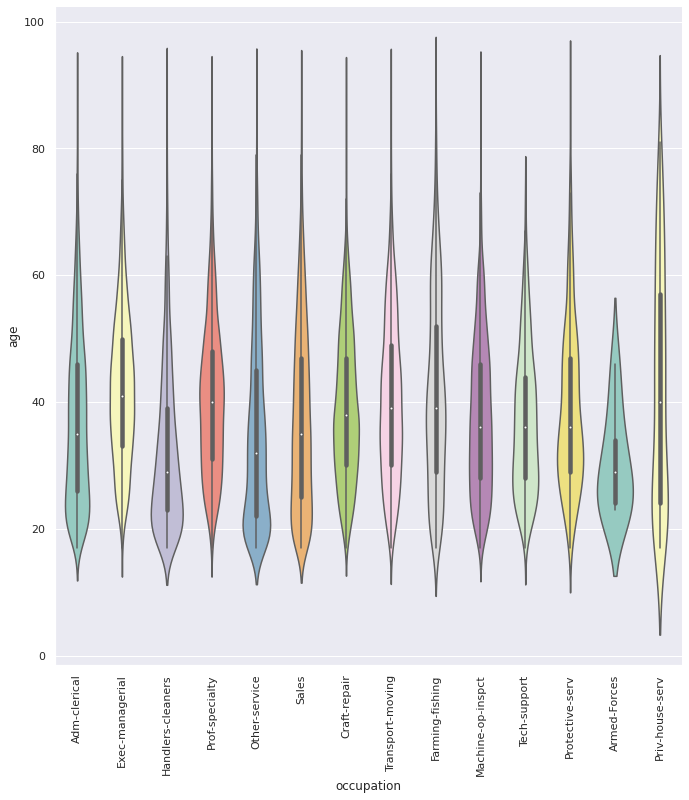

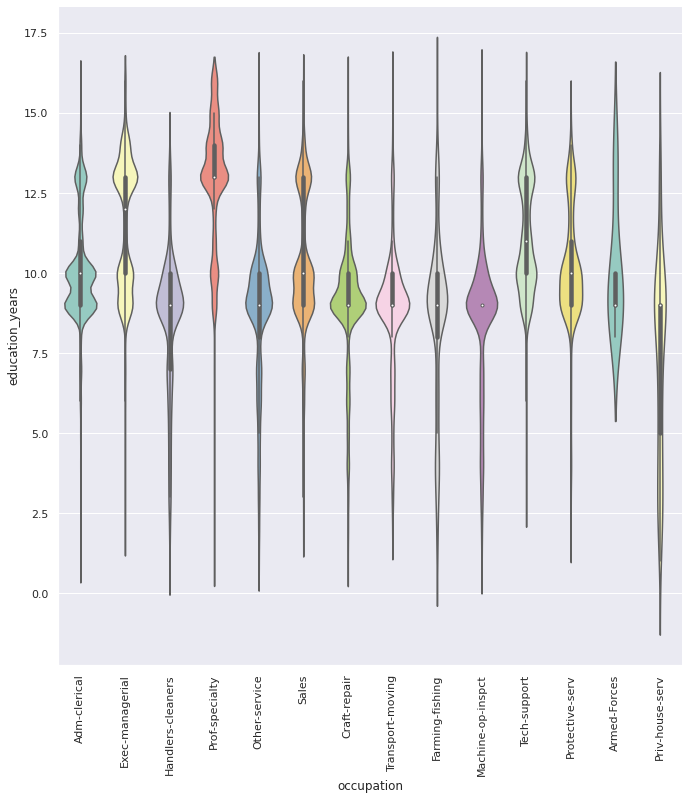

In [371]:
sns.catplot(x='occupation', y='age', data=train_data, palette="Set3",kind="violin", size=10)
plt.xticks(rotation='vertical')
sns.catplot(x='occupation', y='education_years', data=train_data, palette="Set3",kind="violin", size=10)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

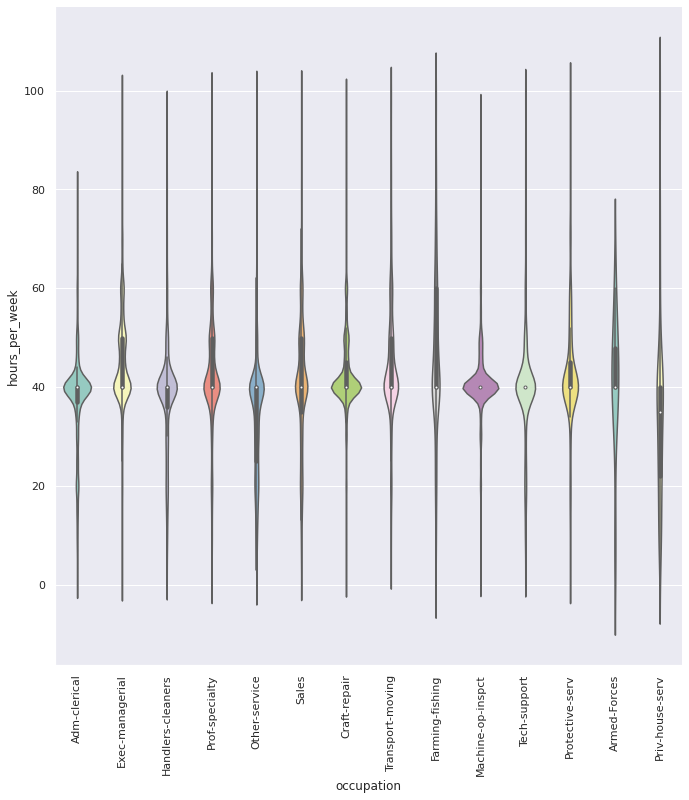

In [319]:
sns.catplot(x='occupation', y='hours_per_week', data=train_data, palette="Set3",kind="violin", size=10)
plt.xticks(rotation='vertical')

Some people who has a 'workclass' with 'Never-worked' value will get 'no' value in 'occupation'. It probably will not make any good for the model, but just make sense.

What about workclass? It was most correalted with occupation. I could drop 'workclass' but looks like it is important for classification. So we keep it and let's see what we can do with nulls. For that let's draw barplots showing joint distribution of 'occupation' and 'workclass'.

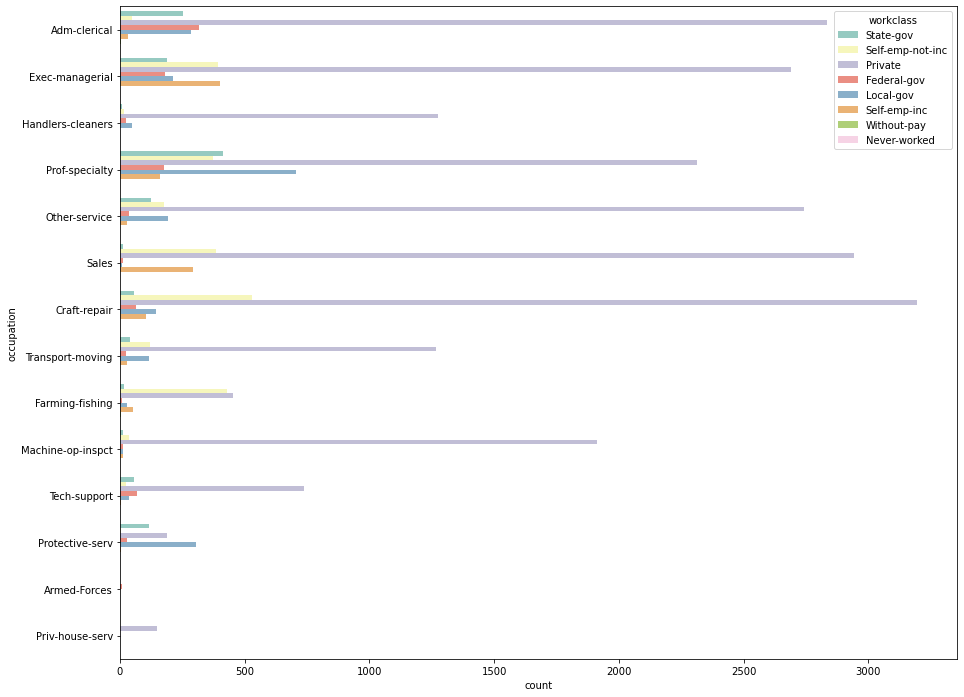

In [422]:
plt.figure(figsize=(15,12))
sns.countplot(y='occupation', hue='workclass', data=train_data, palette="Set3")

Almost among all occupation 'private' sector dominates, so I will fill missing values in  'workclass' with class 'Private'

Bellow is the function with all the data cleaning strategies I discussed.

In [47]:
def prepr_df(df):
    Df = df.copy()
    #drop unnecessary features
    Df.drop(['race','native_country','marital_status'], axis=1, inplace=True)
    
    #fill nulls in occupation
    mask = (Df.workclass.eq('Never-worked') & Df.occupation.isnull())
    Df.loc[mask,'occupation'] = 'no'
    mask = (Df.sex.eq('Male') & Df.occupation.isnull())
    Df.loc[mask,'occupation'] = 'Craft-repair'
    mask = (Df.sex.eq('Female') & Df.occupation.isnull())
    Df.loc[mask,'occupation'] = 'Adm-clerical'
    #fill nulls in workclass
    mask = Df.workclass.isnull()
    Df.loc[mask,'workclass'] = 'Private'
    
    #mergin categories in educarion
    mask = [True if val in ['1st-4th', 'Preschool'] else False for val in Df.education]
    Df.loc[mask,'education'] = 'primary_cs'
    mask = [True if val in ['5th-6th', '7th-8th'] else False for val in Df.education]
    Df.loc[mask,'education'] = 'middle_cs'
    mask = [True if val in ['9th', '10th', '11th', '12th'] else False for val in Df.education]
    Df.loc[mask,'education'] = 'high_cs'
    #mergin categories in occupation
    mask = [True if val in ['Other-service', 'Priv-house-serv'] else False for val in Df.occupation]
    Df.loc[mask,'occupation'] = 'Other-service'
    mask = [True if val in ['Protective-serv','Armed-Forces'] else False for val in Df.occupation]
    Df.loc[mask,'occupation'] = 'Protective-serv'
    #mergin categories in workclass
    mask = [True if val in ['Without-pay', 'Never-worked'] else False for val in Df.workclass]
    Df.loc[mask,'workclass'] = 'no_pay'
    #mergin categories in relationship
    mask = [True if val in ['Husband', 'Wife'] else False for val in Df.relationship]
    Df.loc[mask,'relationship'] = 'spouses'
    mask = [True if val in [ 'Not-in-family', 'Unmarried'] else False for val in Df.relationship]
    Df.loc[mask,'relationship'] = 'not_in_fam'
    mask = [True if val in [ 'Own-child', 'Other-relative'] else False for val in Df.relationship]
    Df.loc[mask,'relationship'] = 'some_fam'
    
    #binaryzing 'sex' feature
    Df['sex'] = (Df['sex'] == 'Male').astype(int)
    
    #combining 'capital_gain' and 'capital_loss'
    Df['capital_gain'] = Df['capital_gain'] - Df['capital_loss']
    Df.drop('capital_loss', axis=1, inplace=True)
    
    return Df


<a class="anchor" id="pr4"></a>
### Tuning hyperparameters

Let's prepar the data for fitting 

In [48]:
cl_train = prepr_df(train_data)

In [49]:
cl_train.columns

Index(['age', 'workclass', 'education', 'education_years', 'occupation',
       'relationship', 'sex', 'capital_gain', 'hours_per_week', 'target'],
      dtype='object')

Split to train and test

In [50]:
cl_tr, cl_val = train_test_split(cl_train, test_size=0.4, random_state=42)

y_train_cl = cl_tr.target
y_valid_cl = cl_val.target
X_train_cl = cl_tr.drop(['target'], axis=1)
X_valid_cl = cl_val.drop(['target'], axis=1)

In [51]:
cl_cat = X_train_cl.columns[X_train_cl.dtypes == 'object'].tolist() 
cl_num =  X_train_cl.columns[X_train_cl.dtypes != 'object'].tolist() 

In [52]:
column_transformer2 = ColumnTransformer([
    ('cat_feat_prep',cat_pipe, cl_cat),
    ('num_feat_prep', num_pipe, cl_num)
])

In [53]:
t2_pipe = Pipeline(steps = [
    ("col_transformer", column_transformer2),
    ("estimator", DecisionTreeClassifier(max_depth = 5))
])

In [54]:
t2_pipe.fit(X_train_cl, y_train_cl)
y_train_cl_pr = t2_pipe.predict(X_train_cl)
print(f1_score(y_train_cl,y_train_cl_pr))
y_valid_cl_pr = t2_pipe.predict(X_valid_cl)
print(f1_score(y_valid_cl,y_valid_cl_pr))

0.641538265630969
0.6321421746608064


In [463]:
depths = [i for i in range(3,11)]
param_grid = {
    "estimator__criterion" : ('gini', 'entropy'),
    "estimator__max_depth" : depths,
    "estimator__min_samples_leaf" :np.linspace(1,40,10, dtype=int),
    "estimator__max_features": ("auto", "sqrt", "log2")
}

grid_pipe = GridSearchCV(t2_pipe, param_grid=param_grid,cv=5, scoring= 'f1')

In [464]:
grid_pipe.fit(X_train_cl, y_train_cl)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('col_transformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat_feat_prep',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                 

In [465]:
print(grid_pipe.best_score_)

0.6328847891365964


That doesn't look good, so I just try another model - GradientBoostingClassifier

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
grb_model = GradientBoostingClassifier(n_estimators=60, max_depth=5)
grb_pipe = Pipeline(steps = [
    ("col_transformer", column_transformer2),
    ("estimator", grb_model)
])
#fit and calculate score
grb_pipe.fit(X_train_cl, y_train_cl)
y_train_cl_pr = grb_pipe.predict(X_train_cl)
print(f1_score(y_train_cl,y_train_cl_pr))
y_valid_cl_pr = grb_pipe.predict(X_valid_cl)
print(f1_score(y_valid_cl,y_valid_cl_pr))

0.7256076083127864
0.7004234297812278
